<a href="https://colab.research.google.com/github/ac1224/First_Test/blob/master/keras_image_recognition_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ディープラーニングでの画像認識

## 教師データ取得（スクレイピング）

必要なライブラリをインストールします

In [0]:
!pip install lxml

必要なライブラリをインポートします

In [0]:
import requests
import re
import uuid
from bs4 import BeautifulSoup
import os

スクレイピングする対象と保存するディレクトリ名(image_data/xxxx/ の形式） を指定します。  
スクレイピング対象とディレクトリ名は必ず1セットにしてください。  

In [0]:
word = 'cat'
images_dir = 'image_data/cat/'

スクレイピングのプログラムを実行します。

In [0]:
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

url = "https://search.nifty.com/imagesearch/search?select=1&chartype=&q=%s&xargs=2&img.fmt=all&img.imtype=color&img.filteradult=no&img.type=all&img.dimensions=large&start=%s&num=20"
#pages = [1,20,40,60,80,100]
pages = [1,20]

numb = 0

for p in pages:
    r = requests.get(url%(word,p))
    soup = BeautifulSoup(r.text,'lxml')
    imgs = soup.find_all('img',src=re.compile('^https://msp.c.yimg.jp/yjimage'))
    for img in imgs:
        print('fetched ' + str(img['src']))
        r = requests.get(img['src'])
        with open(images_dir+str(numb)+str('.jpg'),'wb') as file:
            file.write(r.content)
        numb += 1

fetched https://msp.c.yimg.jp/yjimage?q=N3kEcdIXyLGHb4W1M2V1jk1_tGZsOVzu5K8kqOayS915XuwlLWtQ5kUflKxwEh3f5vfoKnUqjnj2nyaUiXPLRp7gyvAQ8S6WQza4hLfQJJ0v5.YAlOCpYFaJSYLTZZg7m.EB6GLClUQMSN1RmhBX4UHhkLg-&sig=13fs6cbai&x=150&y=85
fetched https://msp.c.yimg.jp/yjimage?q=7Mqf_R8XyLG7Q1XKY1BBUjw6mqYVfPMnCiTvmCfhupN4zn8lwivR1ZDUBcpBCmZ4ca5HxbgzDv6Dvv4H4yFxqmlNrHQwarzkXoPT0tAgcxFW4gWtFUWL9gA9dMsG2wEpEXVXzsIwc06M.2q074W04eXPSeSN&sig=13gmp84e0&x=150&y=100
fetched https://msp.c.yimg.jp/yjimage?q=l9UGqKYXyLHdZpN1A9IK.n7JAFyAbiHOb4pw.rJxRw7QY7JfSwmUlinq7f353sD1OpDnSdfebyIIFoMqtZ3MfuHjzdpOdSVkEORR8gkexw2pOjaZmgAZOy3mpT50Qg6rUfMhW43lxkX3UcODccxVcL1eG9gK&sig=13ge8slvs&x=150&y=79
fetched https://msp.c.yimg.jp/yjimage?q=qxHiL74XyLEpcAy9JdcHBXSLWy6X8u.wM7WIsRrXVCN2oHF1MGL4z8JU9hxzPgOEKV6aeKEwGB8rO_66ASDr8Y_9qTK0AvG0fNKvz5Pn_lbfmWTD1QjNNuyHDBJLpZmPvieVkFwoi_JwDmIj8I8BKsFVW0RE&sig=13gb47dau&x=150&y=79
fetched https://msp.c.yimg.jp/yjimage?q=30xykhAXyLG4u2EyzjSdH9uc9niwFODhLhB1O95OaOit4TwGeEIUBr52RLAOjJHOLZMcf19

検索する単語と保存するディレクトリを変えて、数回繰り返します。  
以下は3回繰り返したものとして進めます

ディレクトリの確認します

In [0]:
!ls image_data

camera	cat


ディレクトリの中身を確認します

In [0]:
!ls image_data/cat

0.jpg	13.jpg	17.jpg	20.jpg	24.jpg	28.jpg	31.jpg	35.jpg	39.jpg	6.jpg
10.jpg	14.jpg	18.jpg	21.jpg	25.jpg	29.jpg	32.jpg	36.jpg	3.jpg	7.jpg
11.jpg	15.jpg	19.jpg	22.jpg	26.jpg	2.jpg	33.jpg	37.jpg	4.jpg	8.jpg
12.jpg	16.jpg	1.jpg	23.jpg	27.jpg	30.jpg	34.jpg	38.jpg	5.jpg	9.jpg


画像の中身を確認します

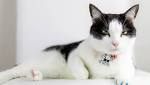

In [0]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('image_data/cat/0.jpg'))

## ラベルファイルの作成

学習するファイルのラベルを作成します

必要なライブラリをインポートします

In [0]:
import sys
import os
import subprocess

データを保存する場所を指定します

In [0]:
backup_dir = './model'

ラベルデータを作成します（最後に表示される class numberが画像の種類の数です）

In [0]:
def cmd(cmd):
    p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    p.wait()
    stdout, stderr = p.communicate()
    return stdout.rstrip()

dirs = cmd("ls "+"./image_data")
labels = dirs.splitlines()

if os.path.exists(backup_dir):
    cmd("rm  -rf "+backup_dir)

# make directories
os.makedirs(backup_dir)


labelsTxt_backup = open(backup_dir + '/labels.txt','w')

classNo=0
for label in labels:
    labelsTxt_backup.write(label.decode('utf-8')+"\n")

    classNo += 1

NUM_CLASSES = classNo
print("class number=" + str(NUM_CLASSES))

labelsTxt_backup.close()

class number=2


ラベルを確認します。ラベル名（camera, dog等）が並んでいればOKです

In [0]:
!cat ./model/labels.txt

camera
cat


## 学習

TensorFlowとKerasは最初からインストールされているので、インストールは不要です（現在、pipでtensorflowをインストールし直すと動作しなくなる現象が見られるので注意下さい）

In [0]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras import optimizers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

バージョンアップで無くなってしまった関数を実装
以下参照

https://github.com/keras-team/keras-preprocessing/blob/59e01a51ef6a38b63f4e7641469fc4280881532d/keras_preprocessing/image/utils.py

https://teratail.com/questions/131

In [0]:
def list_pictures(directory, ext=('jpg', 'jpeg', 'bmp', 'png', 'ppm', 'tif',
                                  'tiff')):
    """Lists all pictures in a directory, including all subdirectories.
    # Arguments
        directory: string, absolute path to the directory
        ext: tuple of strings or single string, extensions of the pictures
    # Returns
        a list of paths
    """
    ext = tuple('.%s' % e for e in ((ext,) if isinstance(ext, str) else ext))
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory) for f in files
            if f.lower().endswith(ext)]

必要なライブラリをインポートします

ラベルファイルを読み込みます

In [0]:
labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

['camera', 'cat']


教師データを読み込みます

In [0]:
X = []
Y = []

# 対象Aの画像
label_num = 0
for label in labels:
    print(label)
    for picture in list_pictures('./image_data/' + label):
        img = img_to_array(load_img(picture, target_size=(64,64)))
        X.append(img)

        Y.append(label_num)
        
    label_num += 1

camera
cat


次にデータ変換を行います。TensorFlowの形式に合うようにフォーマットを変換しているだけですので、ここは最初は、「画像だとこういう変換が必要」くらいの理解でかまいません。
最初の2行は、X（画像情報）のRGB値が0〜255までなのを0〜1までの範囲に変換（正規化）しています。
up_utils.to_categoricalは、ラベルのデータ変換（One-Hot表現）を行う関数です。One-Hotとは、ラベルを数値ではなく、0or1を要素に持つベクトルで扱うことです。つまり、今回の3つのラベルに対してのOne-Hotは、あるサンプルに対するターゲットが「1」のとき、[1, 0, 0]、「2」のときは[0, 1 , 0]、「3」のときは[0, 0, 1]となる表現です。

In [0]:
# arrayに変換
X = np.asarray(X)
Y = np.asarray(Y)

# debug
print(X.shape)
print(Y.shape)

# 画素値を0から1の範囲に変換
X = X.astype('float32')
X = X / 255.0

# クラスの形式を変換
Y = np_utils.to_categorical(Y, NUM_CLASSES)

# 学習用データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)

(80, 64, 64, 3)
(80,)


学習パラメータの設定をします

In [0]:
# 学習率
LEARNING_RATE = 0.001
# バッチサイズ
BATCH_SIZE = 5
# エポック（世代数）
EPOCHS = 100

ニューラルネットワーク（CNN）の定義をします

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', 
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=LEARNING_RATE)

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


モデルの概要を確認します

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
__________

学習してモデルと結果を保存します  
lossがnanになったら学習失敗しているのでやり直して下さい。何度試してもダメな場合は、スクレイピングからやり直して下さい。  
lossが十分小さくなればOKです。学習時間は10分程度です

In [0]:
# モデルの保存
model_json_str = model.to_json()
with open(backup_dir + '/mnist_deep_model.json', 'w') as f:
    f.write(model_json_str)

# 重みデータのバックアップ
cb_cp = keras.callbacks.ModelCheckpoint(backup_dir + '/weights.{epoch:02d}.hdf5', verbose=1, save_weights_only=True)
# TensorBoard用のデータ
cb_tf = keras.callbacks.TensorBoard(log_dir=backup_dir + '/tensorBoard', histogram_freq=0)

start = time.time()

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                   validation_data = (X_test, y_test), verbose = 1,  callbacks=[cb_cp, cb_tf])

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

Instructions for updating:
Use tf.cast instead.
Train on 53 samples, validate on 27 samples
Epoch 1/100
53/53 [==============================] - 3s 58ms/step - loss: 0.8675 - acc: 0.3396 - val_loss: 0.6927 - val_acc: 0.4815

Epoch 00001: saving model to ./model/weights.01.hdf5
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 0.6708 - acc: 0.5660 - val_loss: 0.6722 - val_acc: 0.6296

Epoch 00002: saving model to ./model/weights.02.hdf5
Epoch 3/100
53/53 [==============================] - 0s 3ms/step - loss: 0.6490 - acc: 0.6226 - val_loss: 0.6544 - val_acc: 0.7037

Epoch 00003: saving model to ./model/weights.03.hdf5
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5524 - acc: 0.7736 - val_loss: 0.6892 - val_acc: 0.5556

Epoch 00004: saving model to ./model/weights.04.hdf5
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5874 - acc: 0.6792 - val_loss: 0.6254 - val_acc: 0.5926

Epoch 00005: saving model to ./mode

## 学習結果の可視化

acc（精度）を確認します。accが訓練データでの精度で、この値が高いほど良い性能を意味します。
例えば0.5だと50%の正解率ということになります。

val_accというのが訓練に使っていないテストデータを使っての精度です。  
いわゆる、本当の精度と言われるものは、val_accの方となります。

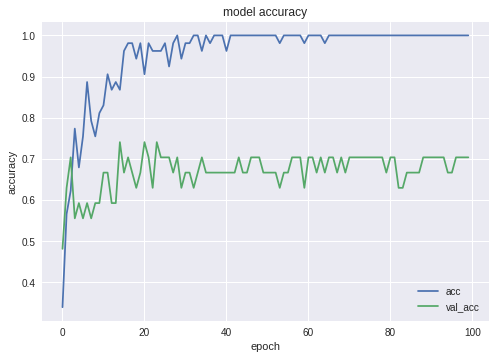

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

lossを確認します。見方はaccと同じです。  
こちらの値は低いほど良い性能を示します。

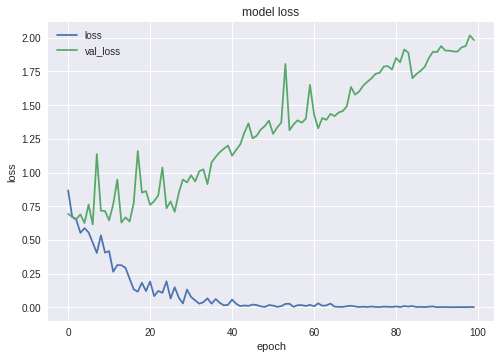

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

## 学習させたモデルを使った推定

学習させたモデルを使って、画像の推定を行います

ライブラリのインポートをします

In [0]:
import numpy as np
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import model_from_json

ラベルを読み込みます

In [0]:
labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

['camera', 'cat']


モデルと学習データを確認します

In [0]:
!ls ./model

labels.txt	       weights.23.hdf5	weights.49.hdf5  weights.75.hdf5
mnist_deep_model.json  weights.24.hdf5	weights.50.hdf5  weights.76.hdf5
tensorBoard	       weights.25.hdf5	weights.51.hdf5  weights.77.hdf5
weights.01.hdf5        weights.26.hdf5	weights.52.hdf5  weights.78.hdf5
weights.02.hdf5        weights.27.hdf5	weights.53.hdf5  weights.79.hdf5
weights.03.hdf5        weights.28.hdf5	weights.54.hdf5  weights.80.hdf5
weights.04.hdf5        weights.29.hdf5	weights.55.hdf5  weights.81.hdf5
weights.05.hdf5        weights.30.hdf5	weights.56.hdf5  weights.82.hdf5
weights.06.hdf5        weights.31.hdf5	weights.57.hdf5  weights.83.hdf5
weights.07.hdf5        weights.32.hdf5	weights.58.hdf5  weights.84.hdf5
weights.08.hdf5        weights.33.hdf5	weights.59.hdf5  weights.85.hdf5
weights.09.hdf5        weights.34.hdf5	weights.60.hdf5  weights.86.hdf5
weights.100.hdf5       weights.35.hdf5	weights.61.hdf5  weights.87.hdf5
weights.10.hdf5        weights.36.hdf5	weights.62.hdf5  weights.88.hdf5
w

モデルや学習結果を読み込みます

In [0]:
# モデルを読み込む
model_pred = model_from_json(open(backup_dir + '/mnist_deep_model.json').read())

# 学習結果を読み込む
model_pred.load_weights(backup_dir + '/weights.99.hdf5')

model_pred.summary();

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
__________

判別したい画像（test.jpg）をアップロードします

In [0]:
from google.colab import files
uploaded = files.upload()

もしくは、以下でダウンロードして下さい

In [0]:
!wget https://github.com/karaage0703/keras-pi/raw/master/data/test.jpg

--2019-02-19 04:14:03--  https://github.com/karaage0703/keras-pi/raw/master/data/test.jpg
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/karaage0703/keras-pi/master/data/test.jpg [following]
--2019-02-19 04:14:04--  https://raw.githubusercontent.com/karaage0703/keras-pi/master/data/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19941 (19K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  19.47K  --.-KB/s    in 0.01s   

2019-02-19 04:14:04 (1.55 MB/s) - ‘test.jpg’ saved [19941/19941]



判別したい画像を確認します

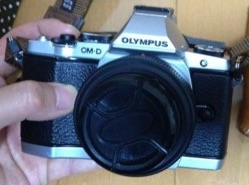

In [0]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('test.jpg'))

画像のフォーマット変換をします

In [0]:
X = []
img_path = './test.jpg'
img = img_to_array(load_img(img_path, target_size=(64,64)))
X.append(img)
X = np.asarray(X)
print(X.shape)

(1, 64, 64, 3)


推論を行います

In [0]:
preds = model_pred.predict(X)

pred_label = ""

label_num = 0
for i in preds[0]:
    if i == 1.0:
        pred_label = labels[label_num]
    label_num += 1

print(pred_label)

camera


これで学習から推論まで終わりです。
学習パラメータ（ハイパーパラメータ）変更などして、学習の様子がどう変わるか見てみましょう

## 学習モデルのダウンロード

Google Colaboratory上のファイルは、自動的に消えてしまうのでファイルを保存します

In [0]:
!ls ./model

labels.txt	       weights.23.hdf5	weights.49.hdf5  weights.75.hdf5
mnist_deep_model.json  weights.24.hdf5	weights.50.hdf5  weights.76.hdf5
tensorBoard	       weights.25.hdf5	weights.51.hdf5  weights.77.hdf5
weights.01.hdf5        weights.26.hdf5	weights.52.hdf5  weights.78.hdf5
weights.02.hdf5        weights.27.hdf5	weights.53.hdf5  weights.79.hdf5
weights.03.hdf5        weights.28.hdf5	weights.54.hdf5  weights.80.hdf5
weights.04.hdf5        weights.29.hdf5	weights.55.hdf5  weights.81.hdf5
weights.05.hdf5        weights.30.hdf5	weights.56.hdf5  weights.82.hdf5
weights.06.hdf5        weights.31.hdf5	weights.57.hdf5  weights.83.hdf5
weights.07.hdf5        weights.32.hdf5	weights.58.hdf5  weights.84.hdf5
weights.08.hdf5        weights.33.hdf5	weights.59.hdf5  weights.85.hdf5
weights.09.hdf5        weights.34.hdf5	weights.60.hdf5  weights.86.hdf5
weights.100.hdf5       weights.35.hdf5	weights.61.hdf5  weights.87.hdf5
weights.10.hdf5        weights.36.hdf5	weights.62.hdf5  weights.88.hdf5
w

In [0]:
!tar cvzf model.tar.gz ./model/weights.99.hdf5 ./model/labels.txt ./model/mnist_deep_model.json

./model/weights.99.hdf5
./model/labels.txt
./model/mnist_deep_model.json


In [0]:
from google.colab import files
files.download("model.tar.gz")

## GPUを使った学習

GPUを使って学習してみます。  
上のメニューから「ランタイム」 ->  「ランタイムのタイプの変更」 -> ハードウェアアクセラレータをGPUに変更します

GPUの情報を確認します

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

マシンのスペックを確認してみます（CPU）

In [0]:
!cat /proc/cpuinfo

GPUのスペックも確認しましょう

In [0]:
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

## ニューラルネットワークの変更

学習に使うニューラルネットワーク。MNISTという手書き認識に使うものを使っていましたが  
少し深めのニューラルネットワークを組んでみました  

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', 
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

モデルの中身を確認します

In [0]:
model.summary()

学習します

In [0]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                   validation_data = (X_test, y_test), verbose = 1)

## データのN増し

精度を上げるために、教師データをN増しします

ライブラリのインポート

In [0]:
import cv2
import numpy as np
import sys
import os

N増し用の画像処理の関数定義

In [0]:
# ヒストグラム均一化
def equalizeHistRGB(src):

    RGB = cv2.split(src)
    Blue   = RGB[0]
    Green = RGB[1]
    Red    = RGB[2]
    for i in range(3):
        cv2.equalizeHist(RGB[i])

    img_hist = cv2.merge([RGB[0],RGB[1], RGB[2]])
    return img_hist

# ガウシアンノイズ
def addGaussianNoise(src):
    row,col,ch= src.shape
    mean = 0
    var = 0.1
    sigma = 15
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = src + gauss

    return noisy

# salt&pepperノイズ
def addSaltPepperNoise(src):
    row,col,ch = src.shape
    s_vs_p = 0.5
    amount = 0.004
    out = src.copy()
    # Salt mode
    num_salt = np.ceil(amount * src.size * s_vs_p)
    coords = [np.random.randint(0, i-1 , int(num_salt))
                 for i in src.shape]
    out[coords[:-1]] = (255,255,255)

    # Pepper mode
    num_pepper = np.ceil(amount* src.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i-1 , int(num_pepper))
             for i in src.shape]
    out[coords[:-1]] = (0,0,0)
    return out

画像ファイルパスのリストを生成

In [0]:
labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

image_file_names = []

for label in labels:
  image_dirs = cmd('ls '+'./image_data/' + label).decode('utf-8')
  image_files = image_dirs.splitlines()
  for image_file in image_files:
    image_file_names.append('./image_data/' + label + '/' + image_file)
    
print(image_file_names)

画像データをN増しします（数分時間がかかります）

In [0]:
# ルックアップテーブルの生成
min_table = 50
max_table = 205
diff_table = max_table - min_table
gamma1 = 0.75
gamma2 = 1.5

LUT_HC = np.arange(256, dtype = 'uint8' )
LUT_LC = np.arange(256, dtype = 'uint8' )
LUT_G1 = np.arange(256, dtype = 'uint8' )
LUT_G2 = np.arange(256, dtype = 'uint8' )

LUTs = []

# 平滑化用
average_square = (10,10)

# ハイコントラストLUT作成
for i in range(0, min_table):
  LUT_HC[i] = 0

for i in range(min_table, max_table):
  LUT_HC[i] = 255 * (i - min_table) / diff_table

for i in range(max_table, 255):
  LUT_HC[i] = 255

# その他LUT作成
for i in range(256):
  LUT_LC[i] = min_table + i * (diff_table) / 255
  LUT_G1[i] = 255 * pow(float(i) / 255, 1.0 / gamma1)
  LUT_G2[i] = 255 * pow(float(i) / 255, 1.0 / gamma2)

LUTs.append(LUT_HC)
LUTs.append(LUT_LC)
LUTs.append(LUT_G1)
LUTs.append(LUT_G2)


for image_file in image_file_names:
#  print(image_file)
  # 画像の読み込み
  img_src = cv2.imread(image_file, 1)
  trans_img = []
  trans_img.append(img_src)

  # LUT変換
  for i, LUT in enumerate(LUTs):
    trans_img.append(cv2.LUT(img_src, LUT))

	# 平滑化
  trans_img.append(cv2.blur(img_src, average_square))

	# ヒストグラム均一化
  trans_img.append(equalizeHistRGB(img_src))

	# ノイズ付加
  trans_img.append(addGaussianNoise(img_src))
  trans_img.append(addSaltPepperNoise(img_src))

	# 反転
  flip_img = []
  for img in trans_img:
     flip_img.append(cv2.flip(img, 1))
  trans_img.extend(flip_img)

  dir_name =  os.path.splitext(os.path.dirname(image_file))[0]
  base_name =  os.path.splitext(os.path.basename(image_file))[0]
  img_src.astype(np.float64)
  
  for i, img in enumerate(trans_img):
    if i > 0:
      #print(dir_name + '/trans_' + base_name + '_' + str(i-1) + '.jpg')
      cv2.imwrite(dir_name + '/trans_' + base_name + '_' + str(i-1) + '.jpg' ,img)

N増しされたデータの確認をします

In [0]:
!ls ./image_data/camera

## 参考リンク

- https://qiita.com/yampy/items/706d44417c433e68db0d
- https://qiita.com/haru1977/items/17833e508fe07c004119
- http://hatakazu.hatenablog.com/entry/2017/06/08/045953
- http://aidiary.hatenablog.com/entry/20161212/1481549365
- http://aidiary.hatenablog.com/entry/20161127/1480240182
- https://qiita.com/Mco7777/items/2b76aba1bae35f2623ea